# Probas

Este caderno ten como proposito probar _parametros_ vendo as imaxes. Todos os módulos pódense executar independientemente.
- **Canles entrada.** O obxectivo e aportar información _util_
- **Aumento de datos.** O obxectivo e simular variación que poden ocurrir no conxunto de proba.
- **Post-procesado.** O obxectivo e mellorar a saída da rede.

---
#### Canales entrada

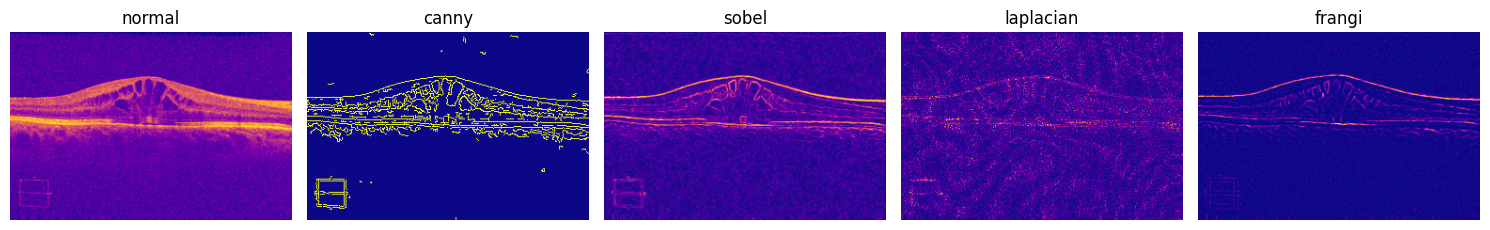

In [2]:
from ConxuntoDatos import ConxuntoDatosOCT
from graficas import grafica_canles

conxuntoDatos = ConxuntoDatosOCT(ruta='../OCT-dataset', 
                                aumento_datos=True, 
                                particion='adestramento',
                                razon=0.9,
                                novo_tamano=(200, 300), 
                                anade_canny=True, 
                                anade_sobel=True, 
                                anade_laplacian=True,
                                anade_frangi=True)

tensor_im, mascara = conxuntoDatos[0]
titulos=['normal', 'canny', 'sobel', 'laplacian', 'frangi']
grafica_canles(tensor_im, titulos)

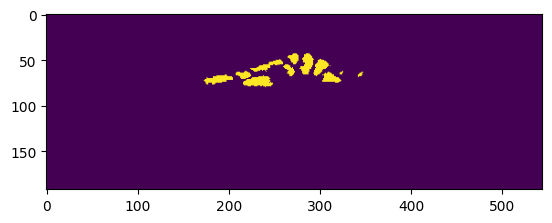

In [2]:
import matplotlib.pyplot as plt

mascara = mascara[0,:,:]
plt.imshow(mascara);

---

#### Aumento de datos

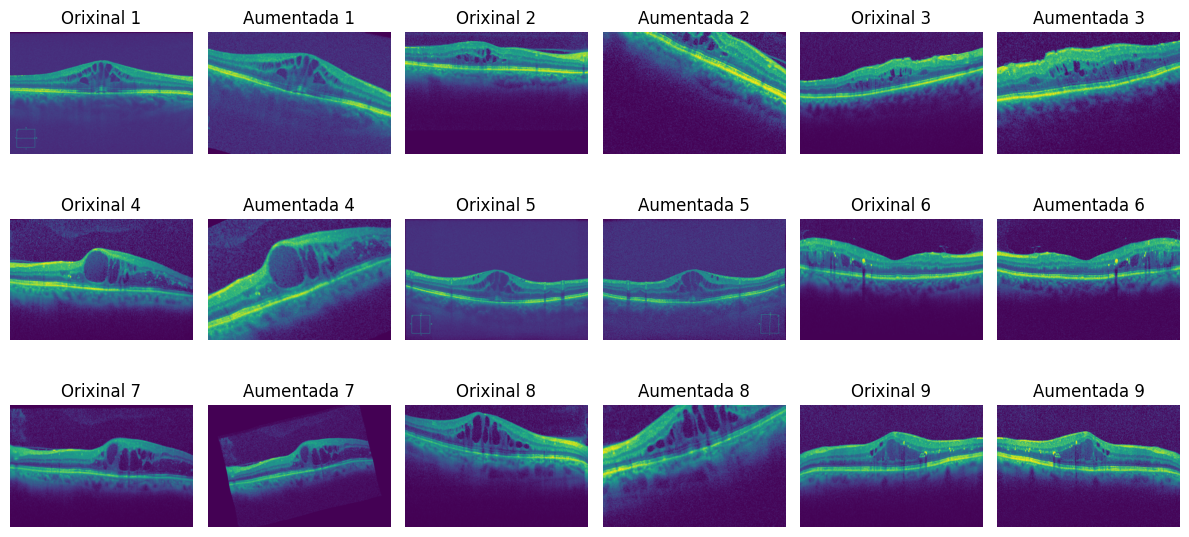

In [1]:
from graficas import grafica_aumento_datos
from ConxuntoDatos import ConxuntoDatosOCT

grafica_aumento_datos(ConxuntoDatosOCT, 3, 3, '../OCT-dataset')

---
#### Post-procesado

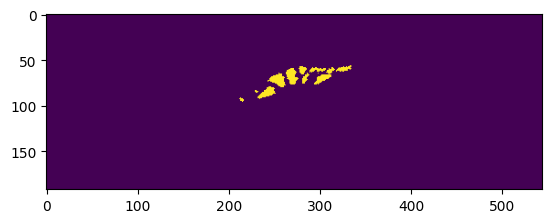

In [11]:
from RedeC import UNet
from transformacions import PostProcesado
from graficas import grafica_prediccions
from ConxuntoDatos import ConxuntoDatosOCT
import matplotlib.pyplot as plt

conxuntoDatos = ConxuntoDatosOCT(ruta='../OCT-dataset', 
                                aumento_datos=True, 
                                particion='adestramento',
                                razon=0.9,
                                novo_tamano=(192, 544), 
                                anade_canny=True, 
                                anade_sobel=True, 
                                anade_laplacian=True,
                                anade_frangi=True)

unet = UNet()
postprocesado = PostProcesado()

tensor_im, mascara = conxuntoDatos[0]

mascara = mascara[0,:,:]
plt.imshow(mascara);

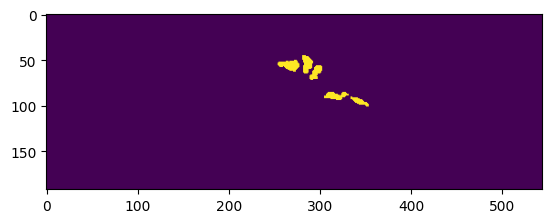

In [2]:
plt.imshow(postprocesado(mascara))